In [1]:
import pytometry as pm
import scanpy as sc
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
BASE = 'G:\\My Drive\\colab\\cytometry\\2022_Nature_Becher\\surface_panel\\batch_1\\'
fls = sorted(os.listdir(BASE))
fls.pop(0)
first = fls[0]

In [3]:
fpath = BASE + first
adata = pm.io.read_fcs(fpath)

In [4]:
sc.pp.subsample(adata, 0.01)

In [5]:
adata

AnnData object with n_obs × n_vars = 1083 × 36
    var: 'Channel Number', 'marker', '$PnD', '$PnB', '$PnR', 'channel', '$PnG', '$PnE'
    uns: 'meta'

In [6]:
sc.pp.neighbors(adata)

In [15]:
%%time
sc.tl.umap(adata)

CPU times: total: 2.89 s
Wall time: 2.93 s


In [16]:
%%time
pm.tl.humap(adata, num_scales=2, include_root_object=True)

CPU times: total: 1min 3s
Wall time: 1min 4s


In [17]:
adata

AnnData object with n_obs × n_vars = 1083 × 36
    var: 'Channel Number', 'marker', '$PnD', '$PnB', '$PnR', 'channel', '$PnG', '$PnE'
    uns: 'meta', 'neighbors', 'humap_settings', 'humap_scales', 'umap'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [18]:
adata.uns['humap_scales']

In [19]:
l1 = adata.uns['humap_scales'][0].X_humap
l2 = adata.uns['humap_scales'][1].X_humap
l3 = adata.uns['humap_scales'][2].X_humap

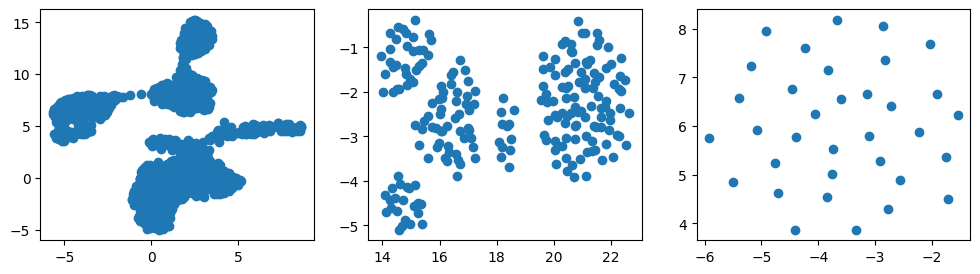

In [20]:
fig, ax = plt.subplots(1,3, figsize=[12, 3])
ax[0].scatter(l1[:,0], l1[:,1])
ax[1].scatter(l2[:,0], l2[:,1])
ax[2].scatter(l3[:,0], l3[:,1])
plt.show()